## **Tutorial for process module for data visualization**

First, begin by importing the developed processor module, as well as numpy and pandas.

In [20]:
import process
import numpy as np
import pandas as pd

To simulate fish model data produced by Matlab/Simscape, the function below was created. This function randomly generates fin translational velocity data for 2 fins. The metadata is also produced which, again, mirrors the format of metadata that would be output by Simscape simulations.

In [21]:
def generate_random_fin_data_csv_file(file_name, seed = 42):
  np.random.seed(seed)
  time = np.arange(0, 10, .001)
  data = []
  fin1_vx = 5 * np.sin(time) + np.random.normal(0, 0.3, time.shape)
  fin1_vy = np.sin(time) * np.cos(time) + np.random.normal(-1, 1, time.shape)
  fin1_vz = np.sin(time) * np.cos(time) + np.random.normal(-.5, .5, time.shape)
  fin2_vx = 5 * np.cos(time) + np.random.normal(-.2, 0.1, time.shape)
  fin2_vy = np.sin(time) * np.cos(time) + np.random.normal(-1, 1, time.shape)
  fin2_vz = np.sin(time) * np.cos(time) + np.random.normal(-.1, .1, time.shape)
  fin2_vz.ravel()[np.random.choice(fin2_vz.size, 9000, replace = False)] = np.nan
  arrays = [time, fin1_vx, fin1_vy, fin1_vz, fin2_vx, fin2_vy, fin2_vz]
  for col in arrays:
    data.append(col)
  data = np.array(data).T  
  np.savetxt(file_name, data, delimiter = ',')

  metadata = []
  parameter = np.array(["model_name", "version_number", "file_path", "solver_type", "solver_name", "step_size", "start_time", "elapsed_time", "stop_event", "error", "columns", "col_units"])
  values = np.array(["my_model", "2", "C:/Users/JDoe/project/my_model.slx", "Fixed_Step", "ode3", "0.001", "2022-11-16 13:48:20", "1.2208", "ReachedStopTime", "None", "time|fin1_vx|fin1_vy|fin1_vz|fin2_vx|fin2_vy|fin2_vz", "s|m/s|m/s|m/s|m/s|m/s|m/s|"])
  
  metadata_info = [parameter, values]
  for col in metadata_info:
    metadata.append(col)
  metadata = np.array(metadata).T
  np.savetxt("metadata.csv", metadata, delimiter = ",", fmt = "% s")  

Use the function to generate data. Let's title it "fin_data.csv"

In [22]:
data = generate_random_fin_data_csv_file("fin_data.csv")

Read the generated data, "fin_data.csv" and "metadata.csv". If importing your own data, this is where you'd begin. Note that the column names aren't shown in the pandas dataframe, they are currenlty held in the metadata. 

In [33]:
data = pd.read_csv("fin_data.csv", header = None)
metadata = pd.read_csv("metadata.csv", header = None)
print(data.head())
print(metadata)

       0         1         2         3         4         5   6
0  0.000  0.149014 -1.678495 -0.325857  4.601943 -1.471858 NaN
1  0.001 -0.036479 -1.304499 -0.357338  4.694499  0.013702 NaN
2  0.002  0.204307 -1.595381 -0.966260  4.741287 -1.196187 NaN
3  0.003  0.471909 -0.886582 -0.207208  4.814944 -0.906431 NaN
4  0.004 -0.050246  0.201178 -1.241041  4.902376 -0.278609 NaN
                 0                                                  1
0       model_name                                           my_model
1   version_number                                                  2
2        file_path                 C:/Users/JDoe/project/my_model.slx
3      solver_type                                         Fixed_Step
4      solver_name                                               ode3
5        step_size                                              0.001
6       start_time                                2022-11-16 13:48:20
7     elapsed_time                                            

Initialize the data processor with the data and metadata files. 

In [25]:
processor = process.DataProcessor(data, metadata)

Let's start by visualizing the data, which can be done using the following function. Calling the function will display the plotting column options for the user. These options are the column names that are held in the metadata. Time isn't included since it will be used for the x-axis since the data coming from Simscape simulations would always be timeseries data.

After producing a plot, the user will be prompted to either save or discard the plot. 

DATA OPTIONS: {1: 'fin1_vx', 2: 'fin1_vy', 3: 'fin1_vz', 4: 'fin2_vx', 5: 'fin2_vy', 6: 'fin2_vz'}
How many columns would you like to select?
The maximum number is: 6
Enter number:
2
Select a column number.
Options: {1: 'fin1_vx', 2: 'fin1_vy', 3: 'fin1_vz', 4: 'fin2_vx', 5: 'fin2_vy', 6: 'fin2_vz'}
Enter number:
1
Select a column number.
Options: {2: 'fin1_vy', 3: 'fin1_vz', 4: 'fin2_vx', 5: 'fin2_vy', 6: 'fin2_vz'}
Enter number:
4


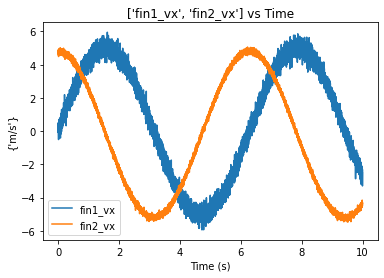

Would you like to save the plot?
Enter choice:y
Your cwd is /content/drive/MyDrive. Would you like to save here?
Enter choice:y
Enter a file name:x_velocity


In [26]:
processor.visualize_data()

Another functionality of the processor is supplying a data rundown, which displays the column name, units, and statistical measures for numerical data. Another key parameter shown in the rundown is the proportion of null data in each column. 


In [27]:
processor.get_data_rundown()

DATA OPTIONS: {1: 'fin1_vx', 2: 'fin1_vy', 3: 'fin1_vz', 4: 'fin2_vx', 5: 'fin2_vy', 6: 'fin2_vz'}
How many columns would you like to select?
The maximum number is: 6
Enter number:
6
+--------------------+--------------------+---------------------+----------------------+---------------------+---------------------+----------------------+
|     Parameter      |      fin1_vx       |       fin1_vy       |       fin1_vz        |       fin2_vx       |       fin2_vy       |       fin2_vz        |
+--------------------+--------------------+---------------------+----------------------+---------------------+---------------------+----------------------+
|    Column Units    |        m/s         |         m/s         |         m/s          |         m/s         |         m/s         |         m/s          |
|     Min Value      | -5.950730131493425 |  -5.026621769771797 |  -2.808672806289706  |  -5.471102596672768 |  -4.870172673753723 | -0.8288293390910787  |
|     Max Value      | 5.953048153901

Since the last column 'fin2_vz' has 90% missing data, it would be a good idea to visualize this data, which can be done once again with the visualize_data function.

DATA OPTIONS: {1: 'fin1_vx', 2: 'fin1_vy', 3: 'fin1_vz', 4: 'fin2_vx', 5: 'fin2_vy', 6: 'fin2_vz'}
How many columns would you like to select?
The maximum number is: 6
Enter number:
1
Select a column number.
Options: {1: 'fin1_vx', 2: 'fin1_vy', 3: 'fin1_vz', 4: 'fin2_vx', 5: 'fin2_vy', 6: 'fin2_vz'}
Enter number:
6


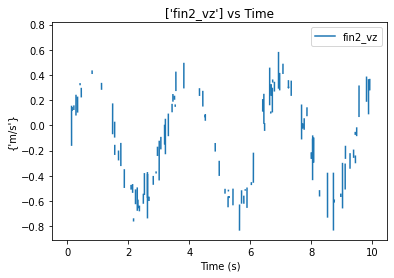

Would you like to save the plot?
Enter choice:n


In [28]:
processor.visualize_data()

Visualizing the data, especially with missing data, can indicate that a sensor may not be operating properly or there is some error with a component in the Simscape model. 

Now, let's look at how Simscape stores the timestamp metadata.

In [29]:
print(processor.get_metadata_dict()["start_time"])

2022-11-16 13:48:20


The data is stored all in one line. It may be beneficial to split the date and time into separate metadata labels. This can be done with the 'extract_timestamp' function. This function removes the date portion of the timestamp and prompts the user if they'd like to save the date under a separate label. The processor metadata is updated in place. Note: this transformation is done to the metadata that was loaded into the processor as opposed to the metadata file itself. Therefore, edits can be made safely without unwantedly corrupting the original metadata file. 

In [30]:
new_meta_dict = processor.extract_timestamp()
print(processor.metadata)

Would you like to save the date in a separate key?
Enter choice:y
Enter a date label name:date
                 0                                                  1
0       model_name                                           my_model
1   version_number                                                  2
2        file_path                 C:/Users/JDoe/project/my_model.slx
3      solver_type                                         Fixed_Step
4      solver_name                                               ode3
5        step_size                                              0.001
6       start_time                                           13:48:20
7     elapsed_time                                             1.2208
8       stop_event                                    ReachedStopTime
9            error                                               None
10         columns  time|fin1_vx|fin1_vy|fin1_vz|fin2_vx|fin2_vy|f...
11       col_units                         s|m/s|m/s|m/s|m/s|m/s|

Finally, the next step would be to upload this data and metadata to a data management system, such a Datafed. To do so, the metadata needs to be in a JSON format, which can easily be done using the processor's "convert_metadata_to_JSON" function.

In [31]:
json_metadata = processor.convert_metadata_to_JSON()
print(json_metadata)

{"model_name": "my_model", "version_number": "2", "file_path": "C:/Users/JDoe/project/my_model.slx", "solver_type": "Fixed_Step", "solver_name": "ode3", "step_size": "0.001", "start_time": "13:48:20", "elapsed_time": "1.2208", "stop_event": "ReachedStopTime", "error": "None", "columns": "time|fin1_vx|fin1_vy|fin1_vz|fin2_vx|fin2_vy|fin2_vz", "col_units": "s|m/s|m/s|m/s|m/s|m/s|m/s|", "date": "2022-11-16"}
